## Proyecto

In [1]:
#Importamos las librerísas necesarias para llevar a cabo el proyecto
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#Cargamos los datos para este proyecto
datos = np.load('proyecto_data/proyecto_training_data.npy')
datos

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [3]:
#Se dividen los datos de la siguiente manera:
# 80% de las filas serán datos de entrenamiento y 20% de las filas serán para pruebas

#Datos de entrenamiento
d_entrenamiento = int(0.8 * len(datos))
ds_entrenamiento = datos[:d_entrenamiento]
#datos de validacion
ds_validacion = datos[d_entrenamiento:]

print('Longitud del data set de entrenamiento: ',len(ds_entrenamiento))
print('Longitud del data set de entrenamiento: ',len(ds_validacion))

Longitud del data set de entrenamiento:  1168
Longitud del data set de entrenamiento:  292


In [4]:
#Convertimos el set de datos que vamos a utlizar para entrenamiento a dataframe para que sea más fácil identificar cada característica y hacer conversiones
#Agregar nombres a las columnas de acuerdo a la información proporcionada
df_entrenamiento = pd.DataFrame(data = ds_entrenamiento, columns = ["PrecioVenta", "CalidadMaterial","PCPerPiso", "THabitaciones", "AConstruccion", "PLFrente"])

#Conversion para los datos de calidad del material, el total de habitaciones y el año de contruscción, ya que son enteros
df_entrenamiento = df_entrenamiento.astype({"CalidadMaterial" : int, "THabitaciones" : int, "AConstruccion" : int})

df_entrenamiento

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1163,108959.0,4,1258.0,6,1969,60.0
1164,194000.0,5,1432.0,5,1978,NaN
1165,233170.0,7,1502.0,7,2009,79.0
1166,245350.0,8,1694.0,7,2008,64.0


In [5]:
# Verificamos la información de cada columna
#Podemos observar que el la característica de PLFrente hay datos nulos
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
PrecioVenta        1168 non-null float64
CalidadMaterial    1168 non-null int32
PCPerPiso          1168 non-null float64
THabitaciones      1168 non-null int32
AConstruccion      1168 non-null int32
PLFrente           962 non-null float64
dtypes: float64(3), int32(3)
memory usage: 41.2 KB


## Inicia Análisis Exploratorio

In [6]:
media  = np.reshape(np.array(df_entrenamiento.mean(axis=0)),(6,1))
v_max =  np.reshape(np.array(df_entrenamiento.max(axis=0)),(6,1))
v_min = np.reshape(np.array(df_entrenamiento.min(axis=0)),(6,1))
rango = np.reshape(np.array(v_max-v_min),(6,1))
d_estandar = np.reshape(np.array(df_entrenamiento.std(axis=0)),(6,1))

d_exploratorios = np.concatenate((media,v_max,v_min,rango,d_estandar), axis=1)

columnas = df_entrenamiento.columns
df_exploratorios = pd.DataFrame(data = d_exploratorios, columns = ["Media", "VMax","Vmin", "Rango", "DEstandar"], index=columnas)

#Conversion para los datos de calidad del material, el total de habitaciones y el año de contruscción, ya que son enteros
df_exploratorios = df_exploratorios.astype({"VMax" : int, "Vmin" : int, "Rango" : int})

df_exploratorios

,Media,VMax,Vmin,Rango,DEstandar
PrecioVenta,180590.277397,755000,34900,720100,78815.697902
CalidadMaterial,6.101027,10,1,9,1.378025
PCPerPiso,1156.323630,3228,334,2894,373.780374
THabitaciones,6.485445,14,2,12,1.609141
AConstruccion,1971.451199,2010,1875,135,29.951707
PLFrente,69.946985,313,21,292,23.478161


In [7]:
df_entrenamiento.describe()

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


### Inician histogramas

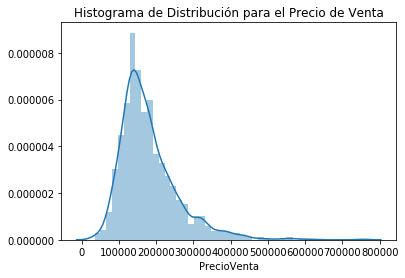

In [8]:
#Histograma para el Precio de Venta
sns.distplot(df_entrenamiento["PrecioVenta"]).set_title("Histograma de Distribución para el Precio de Venta")
plt.show()

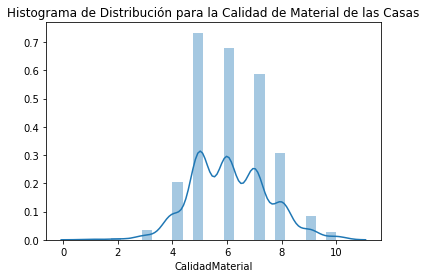

In [9]:
#Histograma para la Calidad de Material
sns.distplot(df_entrenamiento["CalidadMaterial"]).set_title("Histograma de Distribución para la Calidad de Material de las Casas")
plt.show()

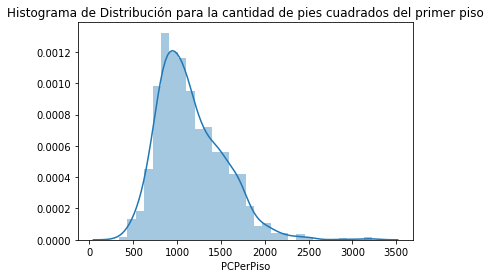

In [10]:
#Histograma para la característica de Pies cuadrados del primer piso de la casa
sns.distplot(df_entrenamiento["PCPerPiso"]).set_title("Histograma de Distribución para la cantidad de pies cuadrados del primer piso")
plt.show()

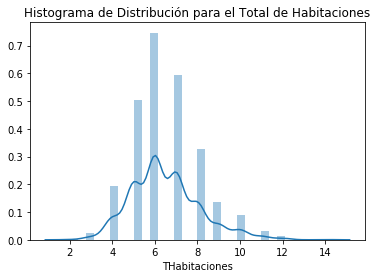

In [11]:
#Histograma para el Total de Habitaciones, sin incluir baños
sns.distplot(df_entrenamiento["THabitaciones"]).set_title("Histograma de Distribución para el Total de Habitaciones")
plt.show()

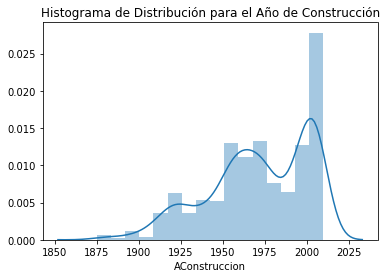

In [12]:
#Histograma para la característica de año de construcción de cada casa
sns.distplot(df_entrenamiento["AConstruccion"]).set_title("Histograma de Distribución para el Año de Construcción")
plt.show()

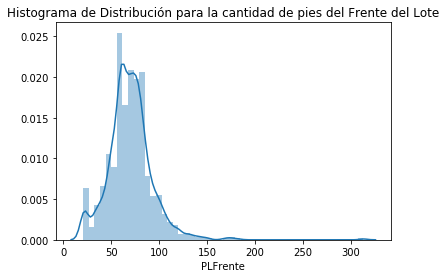

In [13]:
#Histograma para la cantidad de pies del frente del Lote a la calle

#datos_sn = np.array(df_entrenamiento["PLFrente"])
#datos_sn = datos_sn[~np.isnan(datos_sn)]
#Quitamos los datos nulos de esta característica para poder hacer el gráfico
datos_sn = df_entrenamiento['PLFrente'].dropna()

sns.distplot(datos_sn).set_title("Histograma de Distribución para la cantidad de pies del Frente del Lote")
plt.show()

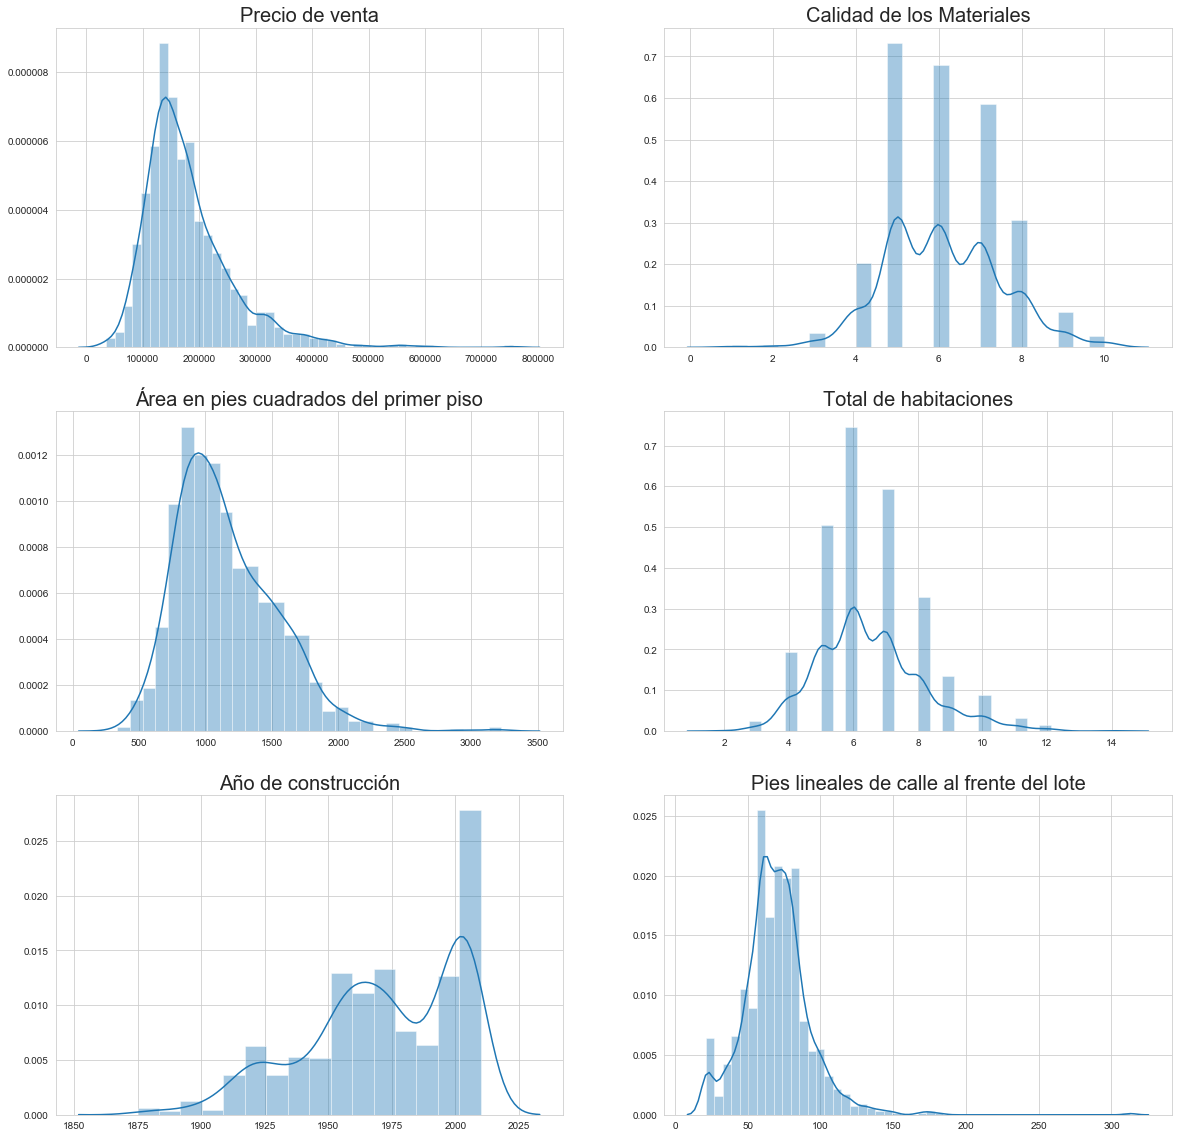

In [14]:
f, ax = plt.subplots(figsize=(20,20))
sns.set_style("whitegrid")

plt.subplot(3, 2, 1)
graficas = sns.distplot(df_entrenamiento['PrecioVenta'], axlabel=False)
plt.title("Precio de venta", fontdict={'fontsize' : 20})

plt.subplot(3, 2, 2)
graficas = sns.distplot(df_entrenamiento['CalidadMaterial'], axlabel=False)
plt.title("Calidad de los Materiales", fontdict={'fontsize' : 20})

plt.subplot(3,2,3)
graficas = sns.distplot(df_entrenamiento['PCPerPiso'], axlabel=False)
plt.title("Área en pies cuadrados del primer piso", fontdict={'fontsize' : 20})

plt.subplot(3,2,4)
graficas = sns.distplot(df_entrenamiento['THabitaciones'], axlabel=False)
plt.title("Total de habitaciones", fontdict={'fontsize' : 20})

plt.subplot(3,2,5)
graficas = sns.distplot(df_entrenamiento['AConstruccion'], axlabel=False)
plt.title("Año de construcción", fontdict={'fontsize' : 20})

plt.subplot(3,2,6)
graficas = sns.distplot(datos_sn, axlabel=False)
plt.title("Pies lineales de calle al frente del lote", fontdict={'fontsize' : 20})


plt.show(graficas)

## Calculo de Coeficiente de Correlacion

In [15]:
#Calculamos el coeficiente de correlación
df_correlacion = df_entrenamiento.corr()
df_correlacion

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
PrecioVenta,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
CalidadMaterial,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
PCPerPiso,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
THabitaciones,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
AConstruccion,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
PLFrente,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


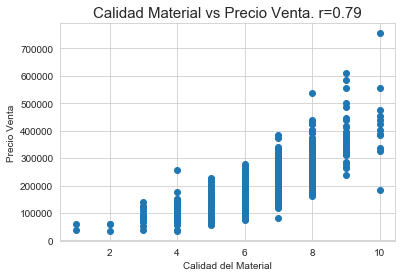

In [16]:
#Gráfico de dispersión de Calidad de los Materiales vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["CalidadMaterial"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Calidad del Material")
ax.set_ylabel("Precio Venta")
ax.set_title("Calidad Material vs Precio Venta. r=" + str(round(df_correlacion.iloc[1,0],2)),fontdict={'fontsize':15})
plt.show()

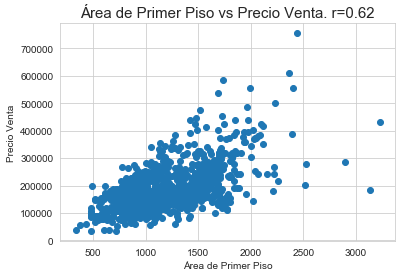

In [17]:
#Gráfico de dispersión de área en pies cuadrados del primer piso vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["PCPerPiso"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Área de Primer Piso")
ax.set_ylabel("Precio Venta")
ax.set_title("Área de Primer Piso vs Precio Venta. r=" + str(round(df_correlacion.iloc[2,0],2)),fontdict={'fontsize':15})
plt.show()

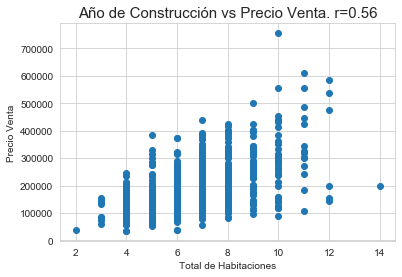

In [18]:
#Gráfico de dispersión del Total de Habitaciones vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["THabitaciones"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Total de Habitaciones")
ax.set_ylabel("Precio Venta")
ax.set_title("Año de Construcción vs Precio Venta. r=" + str(round(df_correlacion.iloc[3,0],2)),fontdict={'fontsize':15})
plt.show()

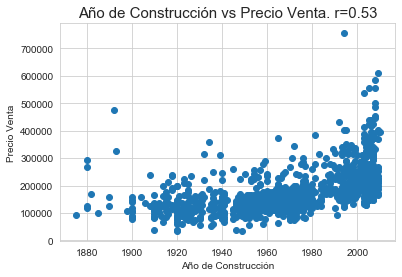

In [19]:
#Gráfico de dispersión de Año de construcción vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["AConstruccion"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Año de Construcción")
ax.set_ylabel("Precio Venta")
ax.set_title("Año de Construcción vs Precio Venta. r=" + str(round(df_correlacion.iloc[4,0],2)),fontdict={'fontsize':15})
plt.show()

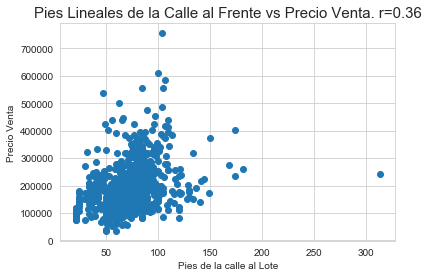

In [20]:
#Gráfico de dispersión de Pies de la calle al Lote vs Precio Venta
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_entrenamiento["PLFrente"], df_entrenamiento["PrecioVenta"])
ax.set_xlabel("Pies de la calle al Lote")
ax.set_ylabel("Precio Venta")
ax.set_title("Pies Lineales de la Calle al Frente vs Precio Venta. r=" + str(round(df_correlacion.iloc[5,0],2)),fontdict={'fontsize':15})
plt.show()

Se ha decidido elegir las variables de Calidad del Material y Pies Cuadrados del Primer Piso, ya que de acuerdo a su coeficiente de correlación, son las dos variables que mejor explican o estiman el precio de venta (Variable Dependiente)

In [21]:
def regesion_lineal(x_vec, y_vec, epochs, imprimir_error_cada, lr):
    
    y = np.array(y_vec) #Convertimos la variable y a un vector
    x = np.vstack(x_vec) #Convertir la variable x a un vector vertical
    x_m = np.concatenate((x, np.ones_like(x)), axis = 1) #Formamos la matriz de n*2
    x_mh = x_m.T #Por medio de la transpuesta convertimos a matriz de 2*n para los calculos posteriores

    #Inicializamos  valores de los parámetros
    m = 0
    b = 0
    parametros = np.array([m,b], dtype = "float64")  #parámetros del modelo
    errores = []       #Listado de errores
    resultados = dict() #Diccionario para almacenar los resultados del modelo, la llave es el número de iteración y el valor un vector con los parámetros que hemos calculado

    for i in range(1,epochs+1):
        
        y_hat = np.dot(x_m,parametros)  #Calculamos "y" estimada
        error = 0.5 * (np.mean(np.power((y - y_hat),2))) #Calculamos el error para estos parámetros
        errores.append(error)   #Guardamos el error
        gradientes = np.mean(((y_hat-y) * x_mh), axis = 1) #Calculamos los gradientes, el primer elemento del vector es el gradiente de m y el segundo el gradiente de b
        #Calculamos nuevos valores para m y b
        parametros = parametros - (lr * gradientes)
        #Almacenamos los resultados del modelo en un diccionario
        resultados[i] = parametros
        #Imprimir informaciòn en pantalla cada cierto numero de iteraciones, indicado en la variable imprimir_error_cada
        if i % imprimir_error_cada == 0:   
            print("El número de iteración es: ", i, "El error del modelo: ",error)

    return resultados, errores


In [22]:
#Probando el modelo manual
regesion_lineal(df_entrenamiento['CalidadMaterial'], df_entrenamiento['PrecioVenta'], 10, 2, 0.000001 )


El número de iteración es:  2 El error del modelo:  19408278249.626297
El número de iteración es:  4 El error del modelo:  19405390989.55459
El número de iteración es:  6 El error del modelo:  19402504192.246643
El número de iteración es:  8 El error del modelo:  19399617857.62829
El número de iteración es:  10 El error del modelo:  19396731985.625366


({1: array([1.18794767, 0.18059028]),
  2: array([2.37584777, 0.36117313]),
  3: array([3.5637003 , 0.54174855]),
  4: array([4.75150526, 0.72231654]),
  5: array([5.93926265, 0.90287711]),
  6: array([7.12697247, 1.08343025]),
  7: array([8.31463473, 1.26397596]),
  8: array([9.50224942, 1.44451424]),
  9: array([10.68981656,  1.6250451 ]),
  10: array([11.87733613,  1.80556854])},
 [19409722053.22175,
  19408278249.626297,
  19406834561.740334,
  19405390989.55459,
  19403947533.059776,
  19402504192.246643,
  19401060967.1059,
  19399617857.62829,
  19398174863.804535,
  19396731985.625366])

In [23]:
def graficar_perdida(iteraciones, errores):  
    y = np.array(errores) 
    x = np.linspace(1, len(iteraciones), len(iteraciones), endpoint=True) #Creamos un arreglo de numeros igual a las iteraciones
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y referencia a una primera gráfica
    ax.plot(x,y)    #graficamos para "x" y "y"
    ax.set_xlabel('Iteración')
    ax.set_ylabel('Error')
    ax.set_title('Gráfica de Error por Iteración') 
    plt.show()

El número de iteración es:  20000 El error del modelo:  5021095031.296429
El número de iteración es:  40000 El error del modelo:  2123924177.454944
El número de iteración es:  60000 El error del modelo:  1540335440.408089
El número de iteración es:  80000 El error del modelo:  1422483692.7232938
El número de iteración es:  100000 El error del modelo:  1398387961.9910474
El número de iteración es:  120000 El error del modelo:  1393166515.025794
El número de iteración es:  140000 El error del modelo:  1391745262.6246357
El número de iteración es:  160000 El error del modelo:  1391089709.7913115


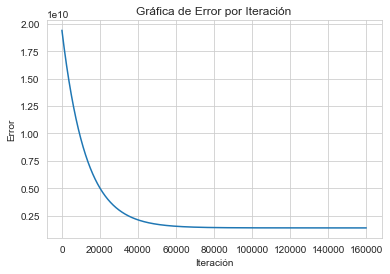

In [42]:
#Prabando la función para la variabe de Calidad de Material
r_cm, e_cm = regesion_lineal(df_entrenamiento['CalidadMaterial'], df_entrenamiento['PrecioVenta'], 160000, 20000, 0.000001)
graficar_perdida(r_cm, e_cm)


El número de iteración es:  10 El error del modelo:  1968121172.4194336
El número de iteración es:  20 El error del modelo:  1968092930.4870648
El número de iteración es:  30 El error del modelo:  1968092848.3025584
El número de iteración es:  40 El error del modelo:  1968092766.1285374


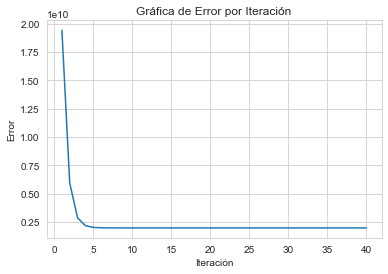

In [25]:
#Prabando la función de la variable de Área del primer piso
r_app, e_pv = regesion_lineal(df_entrenamiento['PCPerPiso'], df_entrenamiento['PrecioVenta'], 40, 10, 0.000001 )
graficar_perdida(r_app, e_pv)

In [26]:
def graficar_rmodelo(x, y, resultado_m, n):    
    xn = np.array(x)
    #x1 = np.linspace(0,np.max(x), 100, endpoint= True)

    for i in range(1,len(resultado_m)+1):
        #Calcular la f(x) con los parámetros proporcionados por el modelo
        funcion = (resultado_m[i][0] * xn) + resultado_m[i][1]
        
        if i % n == 0: 
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y referencia a una primera gráfica
            ax.scatter(xn,y)
            ax.plot(x,funcion, 'red')
            ax.set_xlabel(str(x.name))
            ax.set_ylabel(str(y.name))
            ax.set_title('No. Iteración: ' + str(i))
            plt.show()

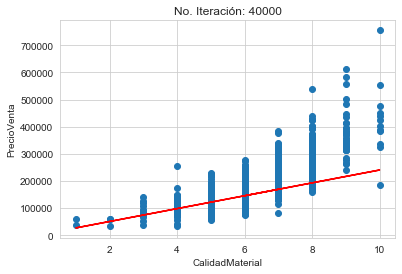

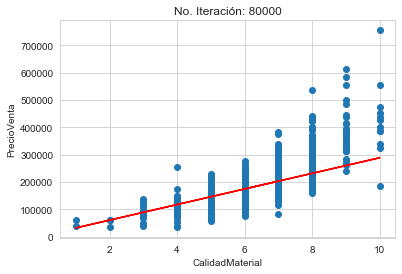

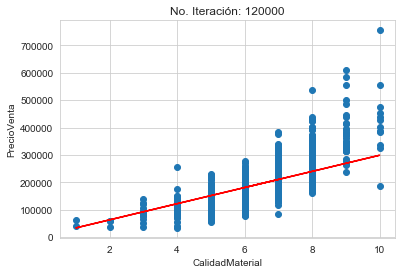

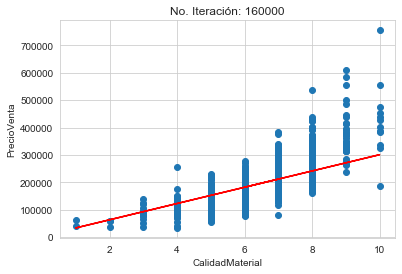

In [27]:
graficar_rmodelo(df_entrenamiento['CalidadMaterial'],df_entrenamiento['PrecioVenta'], r_cm, 40000)

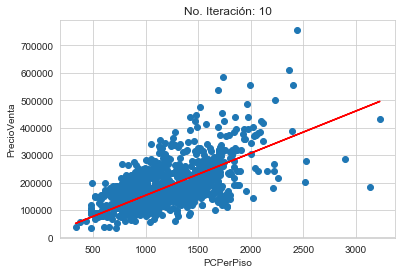

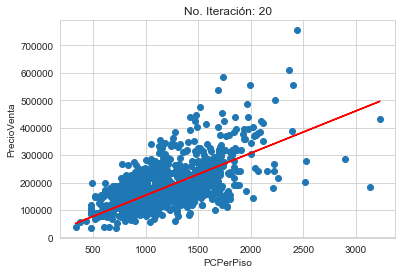

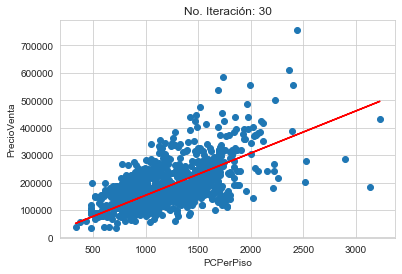

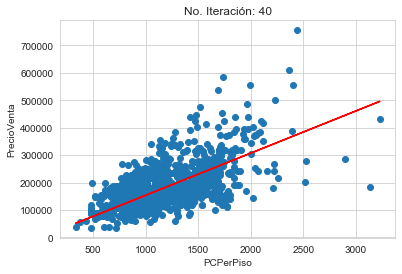

In [28]:
graficar_rmodelo(df_entrenamiento['PCPerPiso'],df_entrenamiento['PrecioVenta'], r_app, 10)

### Modelo con scikit-learn

In [29]:
#obtenemos la variable dependiente "y" y la convertimos en un dataframe
PrecioVenta = pd.DataFrame(df_entrenamiento['PrecioVenta'])

#obtenemos la primera variable independiente "x" y la convertimos en un dataframe
CalidadGeneral = pd.DataFrame(df_entrenamiento['CalidadMaterial'])
#Aplicamos el modelo para estas variables x, y
rl_calidad_general = LinearRegression().fit(CalidadGeneral, PrecioVenta)

#Con algunas de las funciones de la regresión lineal en scikit-learn podemos obtener fácilmente también la pendiente y el intercepto de la función de la recta
pendiente = rl_calidad_general.coef_
intercepto = rl_calidad_general.intercept_

print(pendiente, intercepto)

[[45411.99877916]] [-96469.57131874]


In [30]:
#obtenemos la segunda variable independiente "x" y la convertimos en un dataframe
AreaPPiso = pd.DataFrame(df_entrenamiento['PCPerPiso'])
#Aplicamos el modelo para estas variables x, y
rl_area_ppiso = LinearRegression().fit(AreaPPiso, PrecioVenta)

pendiente = rl_area_ppiso.coef_
intercepto = rl_area_ppiso.intercept_

print(pendiente, intercepto)

[[129.95124229]] [30324.58517496]


### Comparación Modelos

In [48]:
def prediccion_modelos(modelo_manual, modelo_sklearn, x_vec):
    #Aplicamos la función de predict a la varible x para obtener la predicción del modelo de sklearn
    prediccion_sklearn = modelo_sklearn.predict(pd.DataFrame(x_vec)).ravel()

    #Obtenemos la predicción del modelo manual, mediante la función fx de la recta
    prediccion_manual = np.array(modelo_manual[len(modelo_manual)][0] * x_vec + modelo_manual[len(modelo_manual)][1])
    #Calculamos un promedio de las dos predicciones
    promedio_modelos = (prediccion_manual + prediccion_sklearn) * 0.5
    
    return (prediccion_manual, prediccion_sklearn, promedio_modelos)

In [32]:
#Convertimos el set de datos que vamos a utlizar para validación a dataframe para que sea más fácil identificar cada variable "x"
#Agregar nombres a las columnas de acuerdo a la información proporcionada
df_validacion = pd.DataFrame(data = ds_validacion, columns = ["PrecioVenta", "CalidadMaterial","PCPerPiso", "THabitaciones", "AConstruccion", "PLFrente"])

#Conversion para los datos de calidad del material, el total de habitaciones y el año de contruscción, ya que son enteros
df_validacion = df_validacion.astype({"CalidadMaterial" : int, "THabitaciones" : int, "AConstruccion" : int})

df_validacion.head()

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
0,235000.0,6,1236.0,7,1935,120.0
1,625000.0,10,1831.0,10,1995,118.0
2,171000.0,6,1118.0,6,1977,76.0
3,163000.0,6,1261.0,6,1958,76.0
4,171900.0,7,625.0,5,2006,35.0


In [47]:
#Se aplica la función para calcular las predicciones de ambos modelos
#Predicciones para la variable Calidad en los Materiales de Contrucción
pred_manual_calidadm, pred_skl_calidadm, promedio_calidadm = prediccion_modelos(r_cm, rl_calidad_general, df_validacion['CalidadMaterial'])

#Predicciones para la variable de Área del primer piso
pred_manual_app, pred_skl_app, promedio_app = prediccion_modelos(r_app, rl_area_ppiso, df_validacion['PCPerPiso'])


In [34]:
#Fuención para calcular el error en la prediccion de cada madelo
def calcular_error(y, y_hat):
    #Aplicamos la funcion proporcionada para calcular el error
    error = 0.5 * (np.mean(np.power((y - y_hat),2)))
    return error

In [49]:
#Obteniendo el error de cada uno de los modelos para las variables elegidas
y_real = df_validacion['PrecioVenta']
#Error de ambos modelos para la variable de Calidad en el Material
error_manual_cm = calcular_error(y_real, pred_manual_calidadm)
error_skl_cm = calcular_error(y_real, pred_skl_calidadm)

#Error de ambos modelos para la variable de Área del primer piso
error_manual_app = calcular_error(y_real, pred_manual_app)
error_skl_app = calcular_error(y_real, pred_skl_app)

#Creamos dos listas para guardar el error de las variables para cada uno de los modelos
errores_modelo_manual = [error_manual_cm, error_manual_app]
errores_modelo_skl = [error_skl_cm, error_skl_app]


print(errores_modelo_manual, errores_modelo_skl )

[1562969407.5523608, 2437913649.895647] [1315091304.4743197, 2292769137.345938]


list

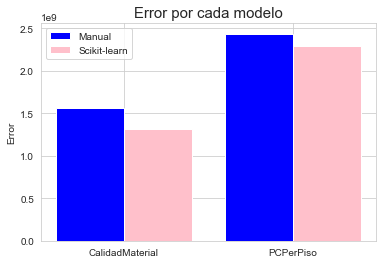

In [50]:
#Graficar el  error de cada modelo para esta variable “x”

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
width = 0.4  #Tamaño de las barras
#Puntos en el eje x en donde posicionaremos los puntos
x = np.arange(len(errores_modelo_manual))
rxm = x - width/2
rxs = x + width/2

#gráfico de barras para cada uno de los modelos
barras1 = ax.bar(rxm, errores_modelo_manual, width, label = 'Manual', color='blue')
barras2 = ax.bar(rxs, errores_modelo_skl, width, label = 'Scikit-learn', color='pink')

ax.set_xticks(x)
ax.set_xticklabels(('CalidadMaterial', 'PCPerPiso'))
ax.set_ylabel('Error')
ax.set_title('Error por cada modelo', fontdict={'fontsize':15})
ax.legend()

plt.show()
